In [1]:
pip install xgboost


In [15]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from xgboost import XGBClassifier
import xgboost as xgb
import matplotlib.pyplot as plt


In [3]:
iris = load_iris()

X = iris.data      # features
y = iris.target    # labels

print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)


In [5]:
xgb_model = XGBClassifier(
    n_estimators=100,      # number of trees
    learning_rate=0.1,     # step size
    max_depth=3,           # tree depth
    subsample=0.8,         # row sampling
    colsample_bytree=0.8,  # feature sampling
    objective="multi:softmax",  # multiclass classification
    num_class=3,
    random_state=42
)


In [6]:
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=3, ...)

In [16]:
def plot_n_xgboost_trees(model, N):
    for i in range(N):
        plt.figure(figsize=(10, 6))
        xgb.plot_tree(model, num_trees=i)
        plt.title(f"XGBoost Decision Stump {i+1}")
        plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

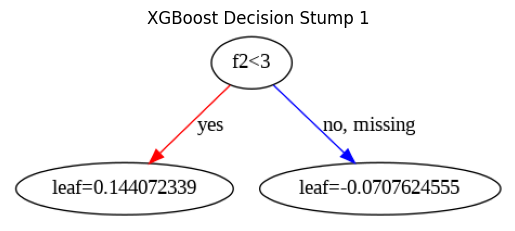

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

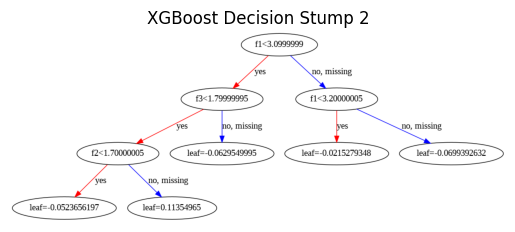

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

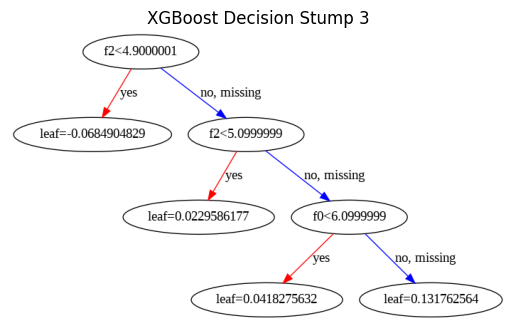

In [17]:
plot_n_xgboost_trees(xgb_model, N=3)


In [7]:
y_pred = xgb_model.predict(X_test)


In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

